**Ideal Transmitted Signal**

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, lfilter

In [2]:
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2

    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes)

In [3]:
def generateChirp(start, end, sr, dur, samples = None):
    '''
    Generates a chirp signal

    Parameters:
    start (float): start frequency of the chirp
    end (float): end frequency of the chirp
    sr (num): sampling rate
    dur (num):  time duration of tone
    '''
    if samples is None:
        samples = int(sr * dur)
    time = np.linspace(0, dur, samples, False)

    linear_chirp = librosa.chirp(fmin=start, fmax=end, sr = sr, length = samples, duration=dur, linear=True)  
    
    return linear_chirp

In [4]:
sampling_rate = 48000
dur = 10
no_of_reps = 10

**Chirp Signal**
- frequency range = 18-20kHz
- chirp duration = 10s

In [5]:
chirp = generateChirp(18000,20000, sampling_rate, dur)

Text(0.5, 1.0, 'Chirp Signal (18-20kHz)')

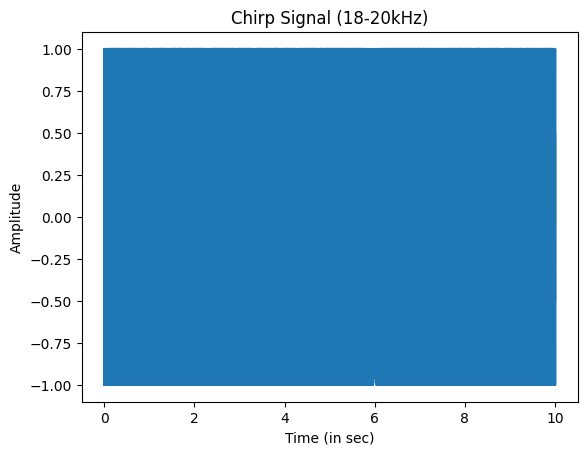

In [6]:
# Time vs Amplitude plot for the chirp 
plt.plot([i/sampling_rate for i in range(len(chirp))], chirp)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Chirp Signal (18-20kHz)")

In [7]:
F_chirp, A_chirp = compute_fft(chirp, sampling_rate)

In [8]:
all_F_chirp = [F_chirp[np.where(A_chirp == np.sort(A_chirp)[::-1][i])] for i in range(10)]
print("Chirp Signal frequencies: ")
all_F_chirp

Chirp Signal frequencies: 


[array([18012.2]),
 array([19987.8]),
 array([18012.1]),
 array([19987.9]),
 array([18012.3]),
 array([19987.7]),
 array([18012.]),
 array([19988.]),
 array([18012.4]),
 array([19987.6])]

Resolution:  0.1


Text(0.5, 1.0, 'Chirp Signal Spectrum')

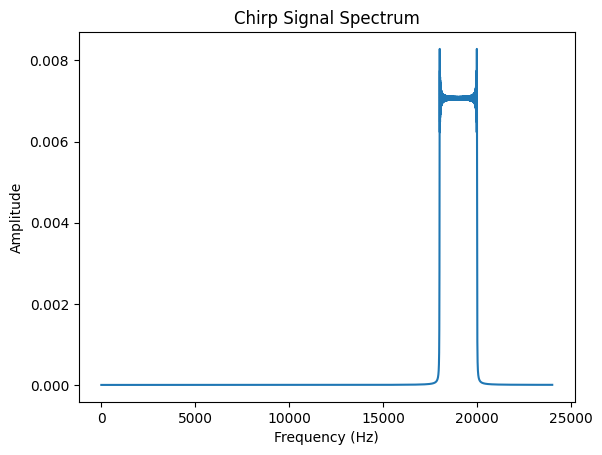

In [9]:
print("Resolution: ", 24000/len(F_chirp))

plt.plot(F_chirp, A_chirp)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Chirp Signal Spectrum')

**Repeated Chirp Signal**
- number of repetitions = 10 
- total signal duration = 100s

In [10]:
repeated_chirp = np.tile(chirp, no_of_reps)

Text(0.5, 1.0, 'Repeated Chirp Signal (18-20kHz)')

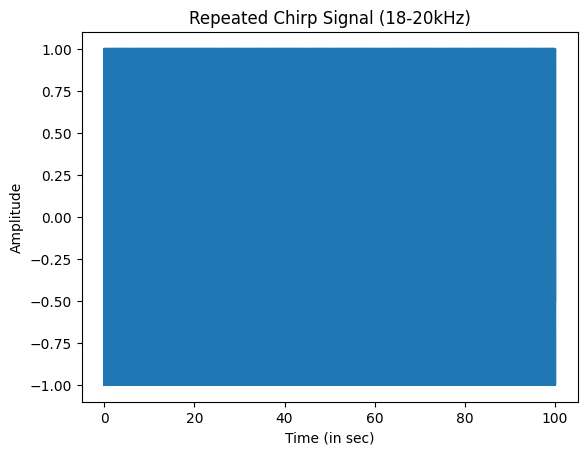

In [11]:
# Time vs Amplitude plot for the repeated chirp 
plt.plot([i/sampling_rate for i in range(len(repeated_chirp))], repeated_chirp)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Repeated Chirp Signal (18-20kHz)")

In [12]:
F_chirp_rep, A_chirp_rep = compute_fft(repeated_chirp, sampling_rate)

In [13]:
all_F_chirp_rep = [F_chirp_rep[np.where(A_chirp_rep == np.sort(A_chirp_rep)[::-1][i])] for i in range(10)]
print("Repeated Chirp Signal frequencies: ")
all_F_chirp_rep

Repeated Chirp Signal frequencies: 


[array([18012.2]),
 array([19987.8]),
 array([18012.1]),
 array([19987.9]),
 array([18012.3]),
 array([19987.7]),
 array([18012.]),
 array([19988.]),
 array([18012.4]),
 array([19987.6])]

Resolution:  0.01


Text(0.5, 1.0, 'Repeated Chirp Signal Spectrum')

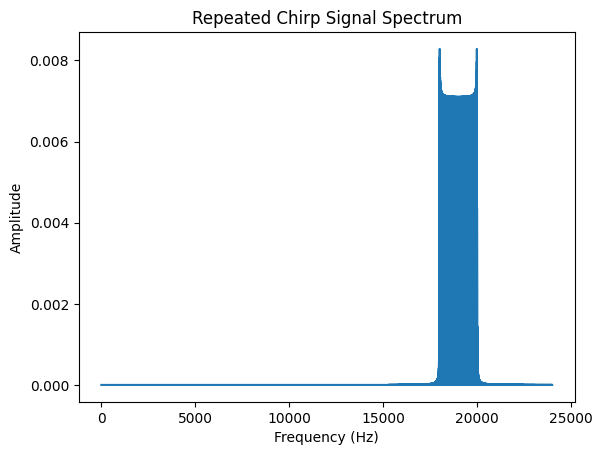

In [14]:
print("Resolution: ", 24000/len(F_chirp_rep))

plt.plot(F_chirp_rep, A_chirp_rep)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Repeated Chirp Signal Spectrum')

**Tone**
- frequency = 11.7Hz
- signal time duration = 10s

In [15]:
def generateAudio(freq, sr, dur, samples=None):
    '''
    Generates a tone (continuous wave)

    Parameters:
    freq (float): frequency of the tone
    sr (num): sampling rate
    dur (num): time duration of tone
    '''
    if samples == None:
        samples = int(sr * dur)
    time = np.linspace(0, dur, samples, False)

    tone = np.sin(2 * np.pi * freq * time)  
    return tone

In [16]:
tone = generateAudio(11.7, sampling_rate, dur)
#tone = generateAudio(11.7, sampling_rate, dur=1)

Text(0.5, 1.0, 'Tone of 11.7Hz')

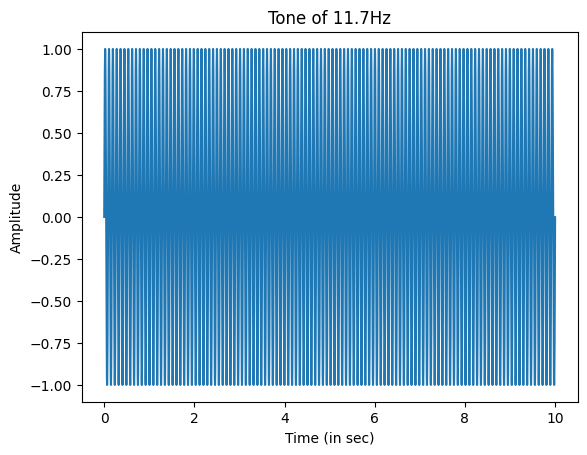

In [17]:
# Time vs Amplitude plot for the tone
plt.plot([i/sampling_rate for i in range(len(tone))], tone)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Tone of 11.7Hz")

In [18]:
F_tone, A_tone = compute_fft(tone, sampling_rate)

In [19]:
all_F_tone = [F_tone[np.where(A_tone == np.sort(A_tone)[::-1][i])] for i in range(10)]
print("Tone frequencies: ")
all_F_tone

Tone frequencies: 


[array([11.7]),
 array([11.8]),
 array([11.6]),
 array([11.9]),
 array([11.5]),
 array([12.]),
 array([11.4]),
 array([12.1]),
 array([11.3]),
 array([12.2])]

Resolution:  0.1


Text(0.5, 1.0, 'Tone Spectrum')

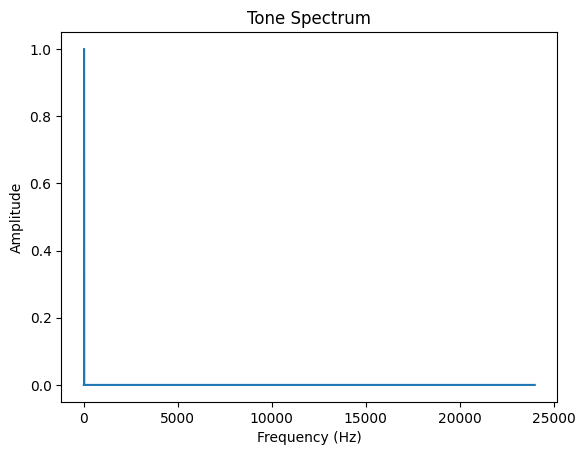

In [20]:
print("Resolution: ", 24000/len(F_tone))

plt.plot(F_tone, A_tone)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Tone Spectrum')

**Repeated Tone**
- frequncey = 11.7Hz
- number of repetitions = 10
- total signal duration = 100s

In [21]:
repeated_tone = np.tile(tone, no_of_reps)

Text(0.5, 1.0, 'Repeated Tone of 11.7Hz')

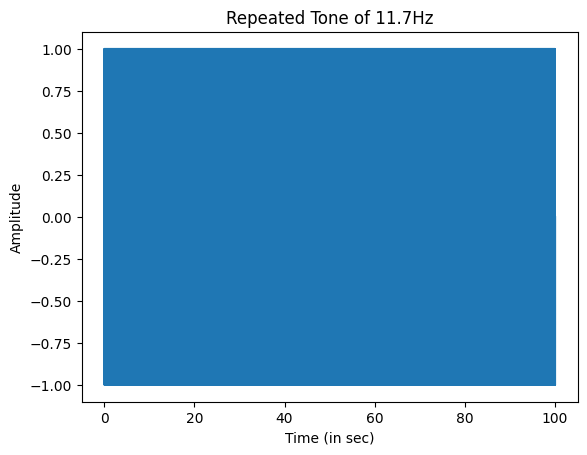

In [22]:
# Time vs Amplitude plot for the repeated tone 
plt.plot([i/sampling_rate for i in range(len(repeated_tone))], repeated_tone)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Repeated Tone of 11.7Hz")

In [23]:
F_tone_rep, A_tone_rep = compute_fft(repeated_tone, sampling_rate)

In [24]:
all_F_tone_rep = [F_tone_rep[np.where(A_tone_rep == np.sort(A_tone_rep)[::-1][i])] for i in range(10)]
print("Repeated Tone frequencies: ")
all_F_tone_rep

Repeated Tone frequencies: 


[array([11.7]),
 array([11.8]),
 array([11.6]),
 array([11.9]),
 array([11.5]),
 array([12.]),
 array([11.4]),
 array([12.1]),
 array([11.3]),
 array([12.2])]

Resolution:  0.01


Text(0.5, 1.0, 'Repeated Tone Spectrum')

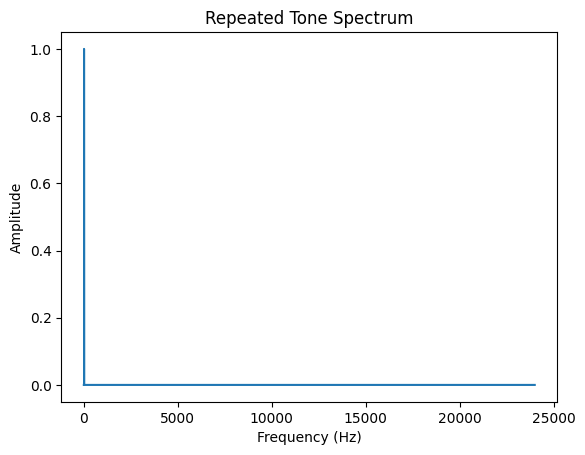

In [25]:
print("Resolution: ", 24000/len(F_tone_rep))
plt.plot(F_tone_rep, A_tone_rep)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Repeated Tone Spectrum')

**Mixed Signal**
- mixing the chirp (18-20kHz) and the tone (11.7Hz)

In [26]:
mixed_signal = chirp + tone

Text(0.5, 1.0, 'Mixed Signal (Chirp and 11.7Hz tone)')

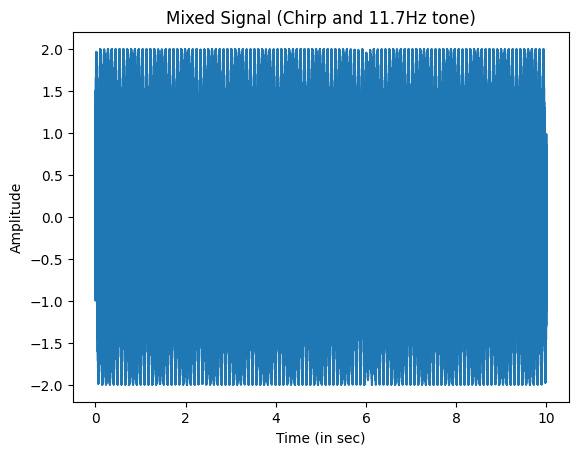

In [27]:
# Time vs Amplitude plot for the mixed signal 
plt.plot([i/sampling_rate for i in range(len(mixed_signal))], mixed_signal)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Mixed Signal (Chirp and 11.7Hz tone)")

In [28]:
F_mixed, A_mixed = compute_fft(mixed_signal, sampling_rate)

In [29]:
all_F_mixed = [F_mixed[np.where(A_mixed == np.sort(A_mixed)[::-1][i])] for i in range(10)]
print("Mixed Signal frequencies: ")
all_F_mixed

Mixed Signal frequencies: 


[array([11.7]),
 array([18012.2]),
 array([19987.8]),
 array([18012.1]),
 array([19987.9]),
 array([18012.3]),
 array([19987.7]),
 array([18012.]),
 array([19988.]),
 array([18012.4])]

Resolution:  0.1


Text(0.5, 1.0, 'Repeated Mixed Signal Spectrum')

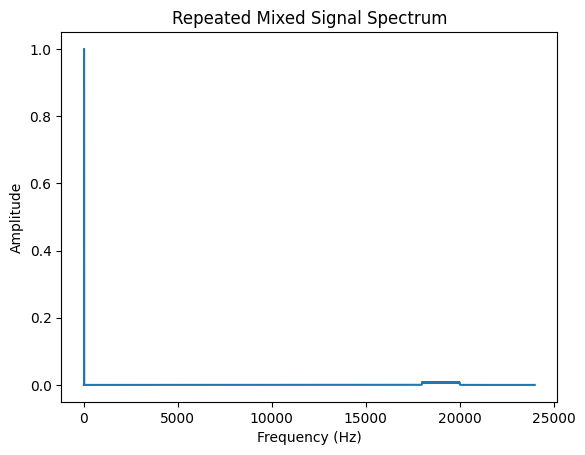

In [30]:
print("Resolution: ", 24000/len(F_mixed))

plt.plot(F_mixed, A_mixed)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Repeated Mixed Signal Spectrum')

**Repeated Mixed Signal**
- mixing the chirp (18-20kHz) and the tone (11.7Hz)
- number of repetitions = 10

In [31]:
repeated_mixed_signal = np.tile(mixed_signal, no_of_reps)

Text(0.5, 1.0, 'Repeated Mixed Signal (Chirp and 11.7Hz tone)')

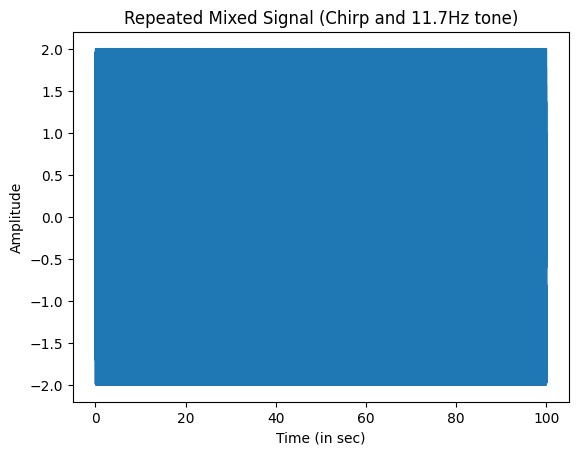

In [32]:
# Time vs Amplitude plot for the repeated tone 
plt.plot([i/sampling_rate for i in range(len(repeated_mixed_signal))], repeated_mixed_signal)
plt.xlabel("Time (in sec)")
plt.ylabel("Amplitude")
plt.title("Repeated Mixed Signal (Chirp and 11.7Hz tone)")

In [33]:
F_mixed_rep, A_mixed_rep = compute_fft(repeated_mixed_signal, sampling_rate)

In [34]:
all_F_mixed_rep = [F_mixed_rep[np.where(A_mixed_rep == np.sort(A_mixed_rep)[::-1][i])] for i in range(10)]
print("Repeated Mixed Signal frequencies: ")
all_F_mixed_rep

Repeated Mixed Signal frequencies: 


[array([11.7]),
 array([18012.2]),
 array([19987.8]),
 array([18012.1]),
 array([19987.9]),
 array([18012.3]),
 array([19987.7]),
 array([18012.]),
 array([19988.]),
 array([18012.4])]

Resolution:  0.01


Text(0.5, 1.0, 'Repeated Mixed Signal Spectrum')

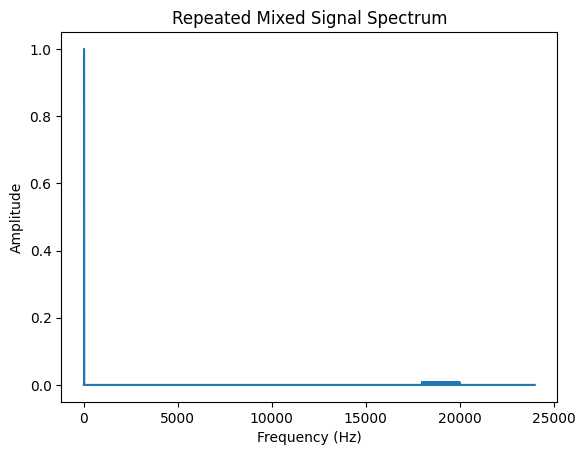

In [35]:
print("Resolution: ", 24000/len(F_mixed_rep))

plt.plot(F_mixed_rep, A_mixed_rep)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Repeated Mixed Signal Spectrum')

**Filtered Signal**
- applying a lowpasss filter with a cutoff frequency of 20Hz, on the repeated mixed signal 

In [36]:
def butter_lowpass_filter(data, cutoff, fs, order=5):

    '''
    Applies a lowpass Butterworth filter to the input signal and returns the filtered signal.

    Parameters:
    data (np.array): The signal to be filtered
    cutoff (float): The cutoff frequency for the lowpass filter
    fs (float): The sampling rate of the signal
    order (int): The order of the Butterworth filter. Default is 5
    '''
    
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

In [37]:
cutoff = 20

In [38]:
filtered_signal = butter_lowpass_filter(repeated_mixed_signal, cutoff, sampling_rate, order = 5)

In [39]:
F_filtered, A_filtered = compute_fft(filtered_signal, sampling_rate)

all_F_filtered = [F_filtered[np.where(A_filtered == np.sort(A_filtered)[::-1][i])] for i in range(10)]
print("Repeated Mixed Signal frequencies: ")
all_F_filtered


Repeated Mixed Signal frequencies: 


[array([11.7]),
 array([6.3]),
 array([2.6]),
 array([0.5]),
 array([0.22]),
 array([4.6]),
 array([2.12]),
 array([2.96]),
 array([1.2]),
 array([1.35])]

Resolution:  0.01


(5.0, 20.0)

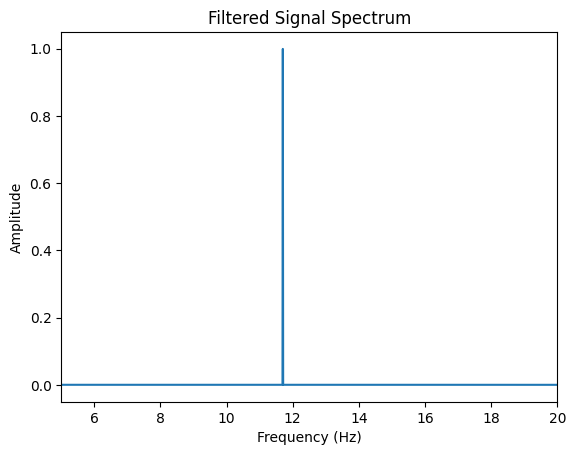

In [40]:
print("Resolution: ", 24000/len(F_filtered))

plt.plot(F_filtered, A_filtered)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal Spectrum')
plt.xlim(5,20)